 <h1 style="font-weight:700; text-align:center; color:#2C3333; font-size:25px;">KLASIFIKASI JENIS LAPORAN MASYARAKAT DI KOTA MALANG <br>MENGGUNAKAN METODE <span style="color:#0E8388;">NAIVE BAYES</span></h1>
 <hr style="height:2px;"/>
<h2 style="font-size:15px; text-align:center; color: #2E4F4F;">Research by Hilda Gokiiill🚀🚀🚀</h2>

<p style="font-weight:bold; color:#cbe4de; font-size:16px; padding-bottom:10px;">colour palette:</p>
<div style="display:flex; flex-direction:row; align-items:center;">
<div class="1" style="width:30px; height:30px; background-color:#CBE4DE; border-radius:12px;"></div>
    <p style="margin-left: 10px; font-weight:bold; color:#CBE4DE; font-size:16px; margin-right:30px;">CBE4DE</p>
    
<div class="1" style="width:30px; height:30px; background-color:#0E8388; border-radius:12px;"></div>
    <p style="margin-left: 10px; font-weight:bold; color:#0E8388; font-size:16px;  margin-right:30px;">0E8388</p>
    
<div class="1" style="width:30px; height:30px; background-color:#2E4F4F; border-radius:12px;"></div>
    <p style="margin-left: 10px; font-weight:bold; color:#2E4F4F; font-size:16px;  margin-right:30px;">2E4F4F</p>
    
<div class="1" style="width:30px; height:30px; background-color:#2C3333; border-radius:12px;"></div>
    <p style="margin-left: 10px; font-weight:bold; color:#2C3333; font-size:16px;  margin-right:30px;">2C3333</p>
    </div>

<p style="font-weight:bold; color:#0E8388; font-size:16px; padding-bottom:10px;">Tahapan Penelitian:</p>
<ul style="list-style:decimal; color:#cbe4de; font-size:16px;">
    <li>Import Library dan Data </li>
    <li>Data Exploration</li>
    <li>Preprocessing<br>
        <ul>
            <li>Cleaning</li>
            <li>Case Folding</li>
            <li>Tokenization</li>
            <li>Stopword Removal</li>
            <li>Stemming</li>
        </ul>
    </li>
    <li>TF-IDF</li>
    <li>Modelling</li>
    <li>Evaluasi dan Validasi Kinerja</li>
    

 <hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#0E8388; font-size:25px; padding-bottom:10px;">Import Library & Data</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#--------------Library Klasifikasi Naive Bayes--------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# ------------Text Preprocessing--------------
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ---------Modelling----------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

#--------------Evaluasi--------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
data_laporan = pd.read_excel("data_laporan.xlsx")
data_laporan

,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan
0,Sambat Web,2022-01-01,Apakah penelitian ke Dinas Komunikasi dan Info...,Permohonan Informasi
1,Media Sosial,2022-10-01,Min kalo mau lapor terkait box reklame di teng...,Permohonan Informasi
2,Media Sosial,2022-01-10,"Dear Pemkot Malang . Mohon di kaji ulang, saya...",Pengaduan Masyarakat
3,Media Sosial,2022-01-28,"Selamat malam kak, maaf mau tanya apakah disna...",Permohonan Informasi
4,Surat Pengaduan,2022-01-29,Keberatan warga terhadap rencana pembangunan l...,Pengaduan Masyarakat
...,...,...,...,...
89,Sambat sms,2023-05-15,SAMBAT Pengurisan ijin reklame jadi susah dan ...,Pengaduan Layanan
90,Sambat sms,2023-05-15,SAMBAT Aktivitas usaha bengkel di jl aris muna...,Pengaduan Masyarakat
91,Lapor.go.id,2023-05-17,Saya usaha UMKM mau mengurus perpanjangan ijin...,Pengaduan Masyarakat
92,Lapor.go.id,2023-05-24,Selamat siang. Saya ingin mengajukan laporan b...,Pengaduan Layanan


 <hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#2e4f4f; font-size:25px; padding-bottom:10px;">Data Exploration</h1>


In [3]:
data_laporan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   media_laporan     94 non-null     object        
 1   tanggal_laporan   94 non-null     datetime64[ns]
 2   uraian_pengaduan  94 non-null     object        
 3   jenis_laporan     94 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.1+ KB


Text(0.5, 1.0, 'Perhitungan Media Laporan Masyarakat Kota Malang')

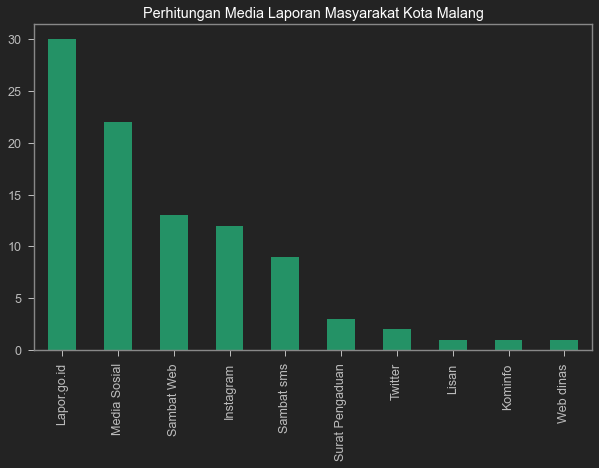

In [4]:
sns.set_palette("summer") 
data_laporan['media_laporan'].value_counts().plot(kind="bar",
                                                  figsize=(10,6))
plt.title("Perhitungan Media Laporan Masyarakat Kota Malang", color="white")

In [5]:
data_laporan['tanggal_laporan'].value_counts()

2022-06-29    3
2023-05-15    3
2023-01-09    3
2022-08-15    3
2022-12-19    3
             ..
2022-07-13    1
2022-07-12    1
2022-07-04    1
2022-06-27    1
2023-05-27    1
Name: tanggal_laporan, Length: 76, dtype: int64

Text(0.5, 1.0, 'Perhitungan Media Laporan Masyarakat Kota Malang')

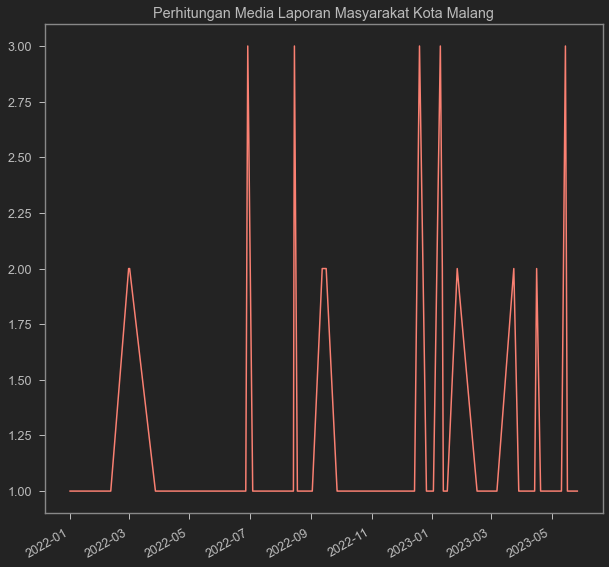

In [6]:
data_laporan['tanggal_laporan'].value_counts().plot(figsize=(10,10), color='salmon')
plt.title("Perhitungan Media Laporan Masyarakat Kota Malang")

Text(0.5, 1.0, 'Perhitungan Jenis Laporan Masyarakat Kota Malang')

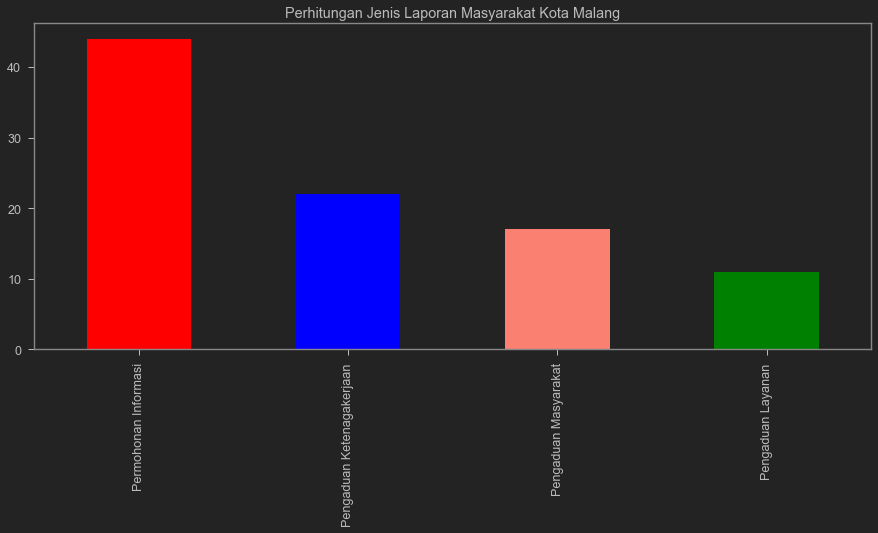

In [7]:
data_laporan['jenis_laporan'].value_counts().plot(kind="bar",
                                                  figsize=(15,6), color=['red','blue','salmon','green'])
plt.title("Perhitungan Jenis Laporan Masyarakat Kota Malang")

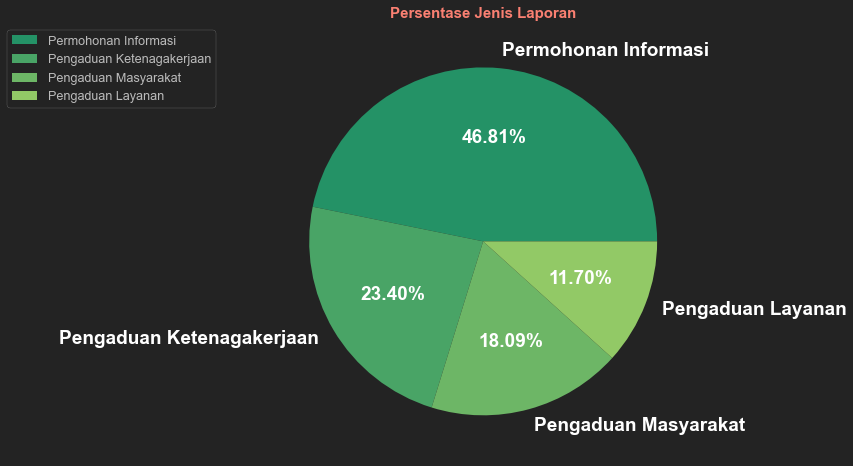

In [8]:
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(data_laporan['jenis_laporan']), 
        labels = ['Permohonan Informasi','Pengaduan Ketenagakerjaan','Pengaduan Masyarakat','Pengaduan Layanan'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '0',
                     'color' : 'w'})

legend_x_pos = -0.1
plt.legend(bbox_to_anchor=(legend_x_pos, 1))
plt.title('Persentase Jenis Laporan', fontsize = 15, fontweight = 'bold', color='salmon')
plt.show()

In [9]:
from PIL import Image

In [10]:
from wordcloud import WordCloud

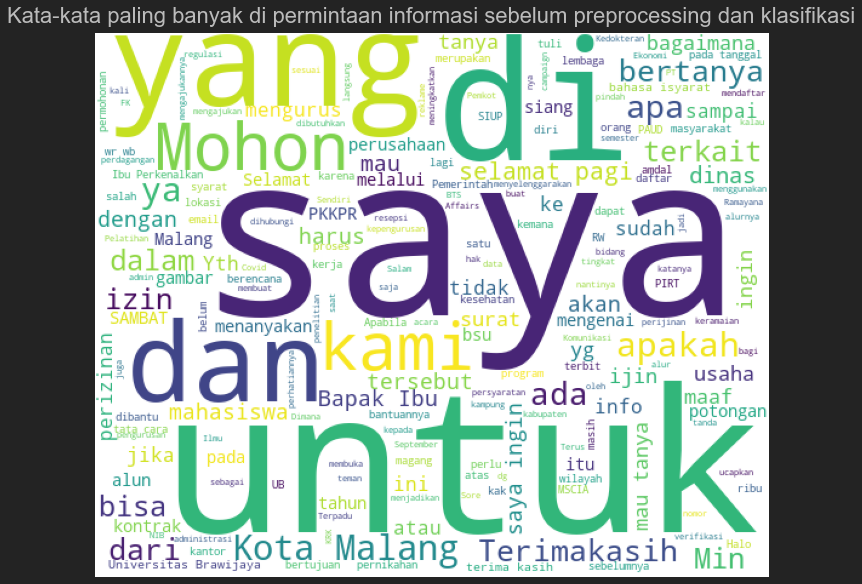

In [11]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_laporan.loc[data_laporan['jenis_laporan'] == 'Permohonan Informasi', 'uraian_pengaduan']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di permintaan informasi sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


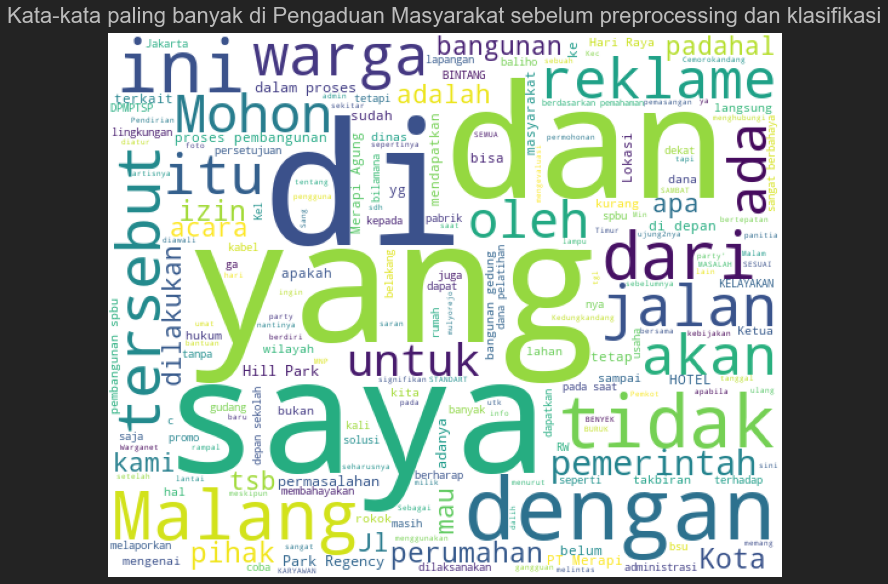

In [12]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_laporan.loc[data_laporan['jenis_laporan'] == 'Pengaduan Masyarakat', 'uraian_pengaduan']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Masyarakat sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


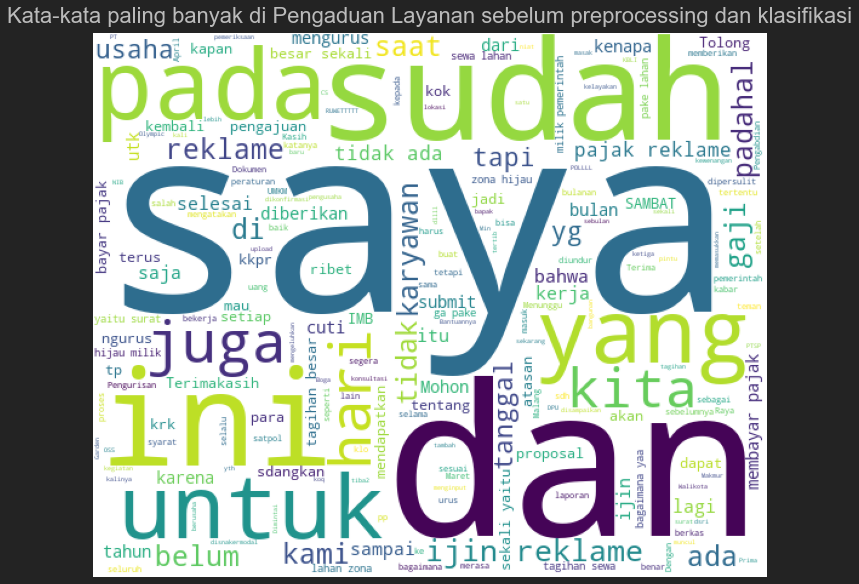

In [13]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_laporan.loc[data_laporan['jenis_laporan'] == 'Pengaduan Layanan', 'uraian_pengaduan']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Layanan sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

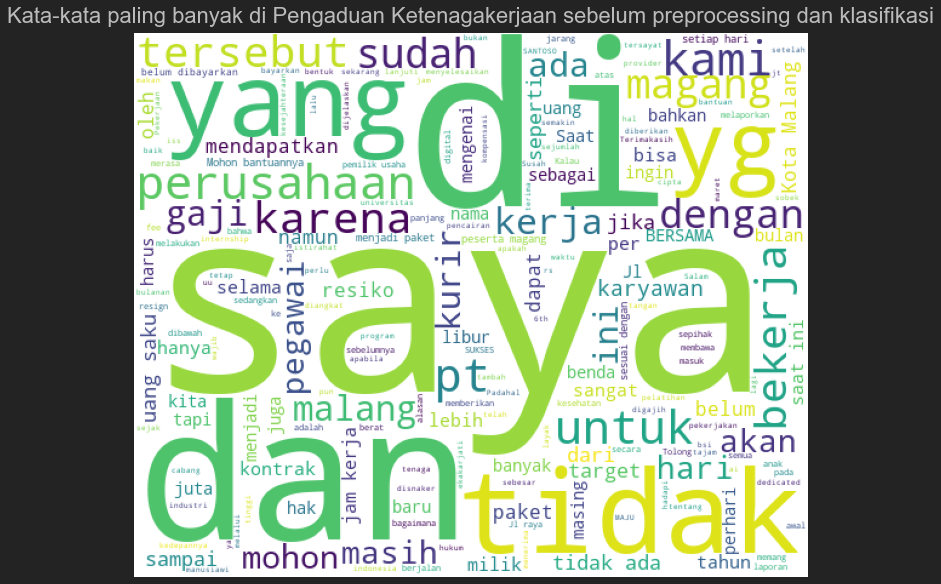

In [14]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_laporan.loc[data_laporan['jenis_laporan'] == 'Pengaduan Ketenagakerjaan', 'uraian_pengaduan']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Ketenagakerjaan sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

Cek Missing Value

In [15]:
data_laporan.isnull().sum()

media_laporan       0
tanggal_laporan     0
uraian_pengaduan    0
jenis_laporan       0
dtype: int64

In [16]:
data_laporan.duplicated().sum()

1

In [17]:
data_laporan.drop_duplicates()

,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan
0,Sambat Web,2022-01-01,Apakah penelitian ke Dinas Komunikasi dan Info...,Permohonan Informasi
1,Media Sosial,2022-10-01,Min kalo mau lapor terkait box reklame di teng...,Permohonan Informasi
2,Media Sosial,2022-01-10,"Dear Pemkot Malang . Mohon di kaji ulang, saya...",Pengaduan Masyarakat
3,Media Sosial,2022-01-28,"Selamat malam kak, maaf mau tanya apakah disna...",Permohonan Informasi
4,Surat Pengaduan,2022-01-29,Keberatan warga terhadap rencana pembangunan l...,Pengaduan Masyarakat
...,...,...,...,...
89,Sambat sms,2023-05-15,SAMBAT Pengurisan ijin reklame jadi susah dan ...,Pengaduan Layanan
90,Sambat sms,2023-05-15,SAMBAT Aktivitas usaha bengkel di jl aris muna...,Pengaduan Masyarakat
91,Lapor.go.id,2023-05-17,Saya usaha UMKM mau mengurus perpanjangan ijin...,Pengaduan Masyarakat
92,Lapor.go.id,2023-05-24,Selamat siang. Saya ingin mengajukan laporan b...,Pengaduan Layanan


 <hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#2e4f4f; font-size:25px; padding-bottom:10px;">Text Preprocessing</h1>

<h1 style="font-weight:bold; color:#0E8388; font-size:18px; padding-bottom:10px;">1. Cleaning and Case Folding</h1>

In [18]:
def clean_text(text):
    text = str(text).lower() #membuat kalimat menjadi huruf kecil semua
    text = re.sub('\[.*?\]', '', text) #menghapus kalimat yang memiliki kurung siku
    text = re.sub('https?://\S+|www\.\S+', '', text) #menghilangkan spasi,dan kalimat yg memiliki URL seperti https, www
    text = re.sub('<.*?>+', '', text) #menghapus tag HTML dari teks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #Menghapus karakter tanda baca dari teks
    text = re.sub('\n', '', text) #menghapus baris baru
    text = re.sub('\w*\d\w*', '', text) #menghapus kalimat yg memiliki angka
    return text

In [19]:
text = 'Untuk perda mengenai pemasangan tiang2 internet provider di Kota Malang apakah sudah ada MinKot @PemkotMalang. Bila belum, ini diperlukan tata caranya spt pendirian menara BTS yg mana jg perlu adanya PIC khusus untk setiap provider di Kota Malang'
text = clean_text(text)

In [20]:
text

'untuk perda mengenai pemasangan  internet provider di kota malang apakah sudah ada minkot pemkotmalang bila belum ini diperlukan tata caranya spt pendirian menara bts yg mana jg perlu adanya pic khusus untk setiap provider di kota malang'

In [21]:
data_laporan['clean_uraian_pengaduan'] = data_laporan['uraian_pengaduan'].apply(clean_text)
data_laporan.head()

,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan,clean_uraian_pengaduan
0,Sambat Web,2022-01-01,Apakah penelitian ke Dinas Komunikasi dan Info...,Permohonan Informasi,apakah penelitian ke dinas komunikasi dan info...
1,Media Sosial,2022-10-01,Min kalo mau lapor terkait box reklame di teng...,Permohonan Informasi,min kalo mau lapor terkait box reklame di teng...
2,Media Sosial,2022-01-10,"Dear Pemkot Malang . Mohon di kaji ulang, saya...",Pengaduan Masyarakat,dear pemkot malang mohon di kaji ulang saya m...
3,Media Sosial,2022-01-28,"Selamat malam kak, maaf mau tanya apakah disna...",Permohonan Informasi,selamat malam kak maaf mau tanya apakah disnak...
4,Surat Pengaduan,2022-01-29,Keberatan warga terhadap rencana pembangunan l...,Pengaduan Masyarakat,keberatan warga terhadap rencana pembangunan l...


In [22]:
data_laporan.tail()

,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan,clean_uraian_pengaduan
89,Sambat sms,2023-05-15,SAMBAT Pengurisan ijin reklame jadi susah dan ...,Pengaduan Layanan,sambat pengurisan ijin reklame jadi susah dan ...
90,Sambat sms,2023-05-15,SAMBAT Aktivitas usaha bengkel di jl aris muna...,Pengaduan Masyarakat,sambat aktivitas usaha bengkel di jl aris muna...
91,Lapor.go.id,2023-05-17,Saya usaha UMKM mau mengurus perpanjangan ijin...,Pengaduan Masyarakat,saya usaha umkm mau mengurus perpanjangan ijin...
92,Lapor.go.id,2023-05-24,Selamat siang. Saya ingin mengajukan laporan b...,Pengaduan Layanan,selamat siang saya ingin mengajukan laporan ba...
93,Lapor.go.id,2023-05-27,Sampai per hari ini belum ada tindak lanjut da...,Pengaduan Ketenagakerjaan,sampai per hari ini belum ada tindak lanjut da...


<h1 style="font-weight:bold; color:#0E8388; font-size:18px; padding-bottom:10px;">2. Tokenizing</h1>

In [23]:
# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [24]:
text = 'untuk perda mengenai pemasangan internet provider di kota malang apakah sudah ada minkot pemkotmalang Bila belum ini diperlukan tata caranya spt pendirian menara bts yg mana jg perlu adanya pic khusus untk setiap provider di kota malang'
text = word_tokenize_wrapper(text)
text

['untuk',
 'perda',
 'mengenai',
 'pemasangan',
 'internet',
 'provider',
 'di',
 'kota',
 'malang',
 'apakah',
 'sudah',
 'ada',
 'minkot',
 'pemkotmalang',
 'Bila',
 'belum',
 'ini',
 'diperlukan',
 'tata',
 'caranya',
 'spt',
 'pendirian',
 'menara',
 'bts',
 'yg',
 'mana',
 'jg',
 'perlu',
 'adanya',
 'pic',
 'khusus',
 'untk',
 'setiap',
 'provider',
 'di',
 'kota',
 'malang']

In [25]:
data_laporan['tokenizing_uraian_pengaduan'] = data_laporan['clean_uraian_pengaduan'].apply(word_tokenize_wrapper)

In [26]:
data_laporan

,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan,clean_uraian_pengaduan,tokenizing_uraian_pengaduan
0,Sambat Web,2022-01-01,Apakah penelitian ke Dinas Komunikasi dan Info...,Permohonan Informasi,apakah penelitian ke dinas komunikasi dan info...,"[apakah, penelitian, ke, dinas, komunikasi, da..."
1,Media Sosial,2022-10-01,Min kalo mau lapor terkait box reklame di teng...,Permohonan Informasi,min kalo mau lapor terkait box reklame di teng...,"[min, kalo, mau, lapor, terkait, box, reklame,..."
2,Media Sosial,2022-01-10,"Dear Pemkot Malang . Mohon di kaji ulang, saya...",Pengaduan Masyarakat,dear pemkot malang mohon di kaji ulang saya m...,"[dear, pemkot, malang, mohon, di, kaji, ulang,..."
3,Media Sosial,2022-01-28,"Selamat malam kak, maaf mau tanya apakah disna...",Permohonan Informasi,selamat malam kak maaf mau tanya apakah disnak...,"[selamat, malam, kak, maaf, mau, tanya, apakah..."
4,Surat Pengaduan,2022-01-29,Keberatan warga terhadap rencana pembangunan l...,Pengaduan Masyarakat,keberatan warga terhadap rencana pembangunan l...,"[keberatan, warga, terhadap, rencana, pembangu..."
...,...,...,...,...,...,...
89,Sambat sms,2023-05-15,SAMBAT Pengurisan ijin reklame jadi susah dan ...,Pengaduan Layanan,sambat pengurisan ijin reklame jadi susah dan ...,"[sambat, pengurisan, ijin, reklame, jadi, susa..."
90,Sambat sms,2023-05-15,SAMBAT Aktivitas usaha bengkel di jl aris muna...,Pengaduan Masyarakat,sambat aktivitas usaha bengkel di jl aris muna...,"[sambat, aktivitas, usaha, bengkel, di, jl, ar..."
91,Lapor.go.id,2023-05-17,Saya usaha UMKM mau mengurus perpanjangan ijin...,Pengaduan Masyarakat,saya usaha umkm mau mengurus perpanjangan ijin...,"[saya, usaha, umkm, mau, mengurus, perpanjanga..."
92,Lapor.go.id,2023-05-24,Selamat siang. Saya ingin mengajukan laporan b...,Pengaduan Layanan,selamat siang saya ingin mengajukan laporan ba...,"[selamat, siang, saya, ingin, mengajukan, lapo..."


<h1 style="font-weight:bold; color:#0E8388; font-size:18px; padding-bottom:10px;">3. Stopword Removal</h1>

In [27]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [28]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "untuk perda mengenai pemasangan internet provider di kota malang apakah sudah ada minkot pemkotmalang bila belum ini diperlukan tata caranya spt pendirian menara bts yg mana jg perlu adanya pic khusus untk setiap provider di kota malang"

kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['perda', 'mengenai', 'pemasangan', 'internet', 'provider', 'kota', 'malang', 'sudah', 'minkot', 'pemkotmalang', 'bila', 'ini', 'diperlukan', 'tata', 'caranya', 'spt', 'pendirian', 'menara', 'bts', 'yg', 'mana', 'jg', 'perlu', 'adanya', 'pic', 'khusus', 'untk', 'provider', 'kota', 'malang']


In [29]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
list_stopwords = set(stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_laporan['stopwords_uraian_pengaduan'] = data_laporan['tokenizing_uraian_pengaduan'].apply(stopwords_removal) 

print('Hasil proses Stopword Removal :') 
data_laporan

Hasil proses Stopword Removal :


,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan,clean_uraian_pengaduan,tokenizing_uraian_pengaduan,stopwords_uraian_pengaduan
0,Sambat Web,2022-01-01,Apakah penelitian ke Dinas Komunikasi dan Info...,Permohonan Informasi,apakah penelitian ke dinas komunikasi dan info...,"[apakah, penelitian, ke, dinas, komunikasi, da...","[penelitian, dinas, komunikasi, informatika, k..."
1,Media Sosial,2022-10-01,Min kalo mau lapor terkait box reklame di teng...,Permohonan Informasi,min kalo mau lapor terkait box reklame di teng...,"[min, kalo, mau, lapor, terkait, box, reklame,...","[min, kalo, mau, lapor, terkait, box, reklame,..."
2,Media Sosial,2022-01-10,"Dear Pemkot Malang . Mohon di kaji ulang, saya...",Pengaduan Masyarakat,dear pemkot malang mohon di kaji ulang saya m...,"[dear, pemkot, malang, mohon, di, kaji, ulang,...","[dear, pemkot, malang, mohon, kaji, ulang, mel..."
3,Media Sosial,2022-01-28,"Selamat malam kak, maaf mau tanya apakah disna...",Permohonan Informasi,selamat malam kak maaf mau tanya apakah disnak...,"[selamat, malam, kak, maaf, mau, tanya, apakah...","[selamat, malam, kak, maaf, mau, tanya, disnak..."
4,Surat Pengaduan,2022-01-29,Keberatan warga terhadap rencana pembangunan l...,Pengaduan Masyarakat,keberatan warga terhadap rencana pembangunan l...,"[keberatan, warga, terhadap, rencana, pembangu...","[keberatan, warga, rencana, pembangunan, lanta..."
...,...,...,...,...,...,...,...
89,Sambat sms,2023-05-15,SAMBAT Pengurisan ijin reklame jadi susah dan ...,Pengaduan Layanan,sambat pengurisan ijin reklame jadi susah dan ...,"[sambat, pengurisan, ijin, reklame, jadi, susa...","[sambat, pengurisan, ijin, reklame, jadi, susa..."
90,Sambat sms,2023-05-15,SAMBAT Aktivitas usaha bengkel di jl aris muna...,Pengaduan Masyarakat,sambat aktivitas usaha bengkel di jl aris muna...,"[sambat, aktivitas, usaha, bengkel, di, jl, ar...","[sambat, aktivitas, usaha, bengkel, jl, aris, ..."
91,Lapor.go.id,2023-05-17,Saya usaha UMKM mau mengurus perpanjangan ijin...,Pengaduan Masyarakat,saya usaha umkm mau mengurus perpanjangan ijin...,"[saya, usaha, umkm, mau, mengurus, perpanjanga...","[usaha, umkm, mau, mengurus, perpanjangan, iji..."
92,Lapor.go.id,2023-05-24,Selamat siang. Saya ingin mengajukan laporan b...,Pengaduan Layanan,selamat siang saya ingin mengajukan laporan ba...,"[selamat, siang, saya, ingin, mengajukan, lapo...","[selamat, siang, mengajukan, laporan, tempat, ..."


<h1 style="font-weight:bold; color:#0E8388; font-size:18px; padding-bottom:10px;">4. Stemming</h1>

In [30]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
hasil = stemmer.stem(kalimat)
print(hasil)

andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis murah


In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 
kalimat = "['perda', 'mengenai', 'pemasangan', 'internet', 'provider', 'kota', 'malang', 'sudah', 'minkot', 'pemkotmalang', 'bila', 'ini', 'diperlukan', 'tata', 'caranya', 'spt', 'pendirian', 'menara', 'bts', 'yg', 'mana', 'jg', 'perlu', 'adanya', 'pic', 'khusus', 'untk', 'provider', 'kota', 'malang']"
hasil = stemmer.stem(kalimat)
print(hasil)

perda kena pasang internet provider kota malang sudah minkot pemkotmalang bila ini perlu tata cara spt diri menara bts yg mana jg perlu ada pic khusus untk provider kota malang


In [32]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_laporan['stopwords_uraian_pengaduan']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print("Jumlah Kata Hasil Stemming: ", len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
#print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_laporan['stemming_uraian_pengaduan'] = data_laporan['stopwords_uraian_pengaduan'].swifter.apply(get_stemmed_term)
#print(data_laporan['stemming_uraian_pengaduan'])

Jumlah Kata Hasil Stemming:  1501
------------------------
penelitian : teliti
dinas : dinas
komunikasi : komunikasi
informatika : informatika
kota : kota
malang : malang
perlu : perlu
surat : surat
persetujuan : tuju
kesbangpol : kesbangpol
min : min
kalo : kalo
mau : mau
lapor : lapor
terkait : kait
box : box
reklame : reklame
tengah : tengah
jalan : jalan
membahayakan : bahaya
pengemudi : kemudi
nantinya : nanti
lokasi : lokasi
jl : jl
a : a
yani : yani
depan : depan
plasa : plasa
telkom : telkom
dear : dear
pemkot : pemkot
mohon : mohon
kaji : kaji
ulang : ulang
melihat : lihat
promo : promo
rokok : rokok
sekolah : sekolah
tdk : tdk
sebaiknya : baik
promobaliho : promobaliho
semacam : macam
ditinjau : tinjau
masak : masak
rokokbaliho : rokokbaliho
taruh : taruh
telivisi : telivisi
u : u
iklan : iklan
sdh : sdh
diatur : atur
jamnya : jam
sang : sang
timur : timur
bandung : bandung
selamat : selamat
malam : malam
kak : kak
maaf : maaf
tanya : tanya
disnaker : disnaker
kerjasama : ker

kebijakan : bijak
penyelenggara : selenggara
jakarta : jakarta
acara : acara
diadakan : ada
army : army
night : night
paradise : paradise
bertepatan : tepat
takbiran : takbir
idul : idul
adha : adha
etis : etis
hari : hari
hampir : hampir
orang : orang
e : e
diindahkan : indah
dalih : dalih
dilaksanaka : dilaksanaka
terkesan : kes
merendahkan : rendah
bukan : bukan
malah : malah
menghargai : harga
raya : raya
kata : kata
party : party
disandingkan : sanding
dibenturkan : bentur
umat : umat
beragama : agama
setuju : tuju
bersama : sama
meskipun : meski
dimodifikasi : modifikasi
ninghargai : ninghargai
muslim : muslim
pantas : pantas
tanggal : tanggal
konser : konser
kpop : kpop
the : the
boyz : boyz
panitia : panitia
dimundurkan : mundur
tgl : tgl
de : de
nah : nah
mnp : mnp
ga : ga
artisnya : artis
manajemennya : manajemen
serumit : rumit
jkt : jkt
maksa : maksa
diadain : diadain
mundur : mundur
darian : dari
pariwisata : pariwisata
dkirena : dkirena
tanyakan : tanya
mala : mala
dki : 

upload : upload
dikonfirmasi : konfirmasi
sebulan : bulan
selesai : selesai
konsultasi : konsultasi
cs : cs
kewenangan : wenang
pemeriksaan : periksa
konfirmasi : konfirmasi
pkkpr : pkkpr
dismpaikan : dismpaikan
terbit : terbit
desember : desember
periksa : periksa
diperiksa : periksa
berdasarkan : dasar
tiket : tiket
berkepentingandomisili : berkepentingandomisili
kedua : dua
mencoba : coba
laporpermasalahan : laporpermasalahan
signifikan : signifikan
berharap : harap
membantu : bantu
mengevaluasi : evaluasi
permasalahan : masalah
uu : uu
spbu : spbu
perumahanrumah : perumahanrumah
berjarak : jarak
kosong : kosong
alat : alat
sedang : sedang
tersebutberdasarkan : tersebutberdasarkan
spbulokasi : spbulokasi
lampirkan : lampir
google : google
map : map
pertanyaan : tanya
meliputi : liput
jarak : jarak
kekuatiran : kekuatiran
adalaha : adalaha
dampak : dampak
getaran : getar
rasakan : rasa
sisi : sisi
kiri : kiri
kanan : kanan
propertyapa : propertyapa
bilamana : bilamana
mengakibatkan :

ijinnya : ijinnya
laporan : lapor
sebelumnyapara : sebelumnyapara
seluruh : seluruh
mengundur : undur
karyawansetelah : karyawansetelah
diliburkan : libur
tertentu : tentu
mengatakan : kata
dikabari : kabar
diundur : undur
mendekati : dekat
kemarinjadi : kemarinjadi
termasuk : masuk
sebenernya : sebenernya
sajasebelumnya : sajasebelumnya
dikontrak : kontrak
cuti : cuti
mengambil : ambil
sisa : sisa
sekalidan : sekalidan
isi : isi
derajat : derajat
sebenarnya : benar
temanteman : temanteman
haknyaterima : haknyaterima
tembakau : tembakau
makin : makin
membagun : membagun
debu : debu
bunyi : bunyi
paku : paku
bumi : bumi
merusak : rusak
usut : usut
pbgnya : pbgnya
disini : sini
naikkan : naik
pusat : pusat
penerima : terima
template : template
------------------------


Pandas Apply:   0%|          | 0/94 [00:00<?, ?it/s]

In [33]:
data_laporan

,media_laporan,tanggal_laporan,uraian_pengaduan,jenis_laporan,clean_uraian_pengaduan,tokenizing_uraian_pengaduan,stopwords_uraian_pengaduan,stemming_uraian_pengaduan
0,Sambat Web,2022-01-01,Apakah penelitian ke Dinas Komunikasi dan Info...,Permohonan Informasi,apakah penelitian ke dinas komunikasi dan info...,"[apakah, penelitian, ke, dinas, komunikasi, da...","[penelitian, dinas, komunikasi, informatika, k...","[teliti, dinas, komunikasi, informatika, kota,..."
1,Media Sosial,2022-10-01,Min kalo mau lapor terkait box reklame di teng...,Permohonan Informasi,min kalo mau lapor terkait box reklame di teng...,"[min, kalo, mau, lapor, terkait, box, reklame,...","[min, kalo, mau, lapor, terkait, box, reklame,...","[min, kalo, mau, lapor, kait, box, reklame, te..."
2,Media Sosial,2022-01-10,"Dear Pemkot Malang . Mohon di kaji ulang, saya...",Pengaduan Masyarakat,dear pemkot malang mohon di kaji ulang saya m...,"[dear, pemkot, malang, mohon, di, kaji, ulang,...","[dear, pemkot, malang, mohon, kaji, ulang, mel...","[dear, pemkot, malang, mohon, kaji, ulang, lih..."
3,Media Sosial,2022-01-28,"Selamat malam kak, maaf mau tanya apakah disna...",Permohonan Informasi,selamat malam kak maaf mau tanya apakah disnak...,"[selamat, malam, kak, maaf, mau, tanya, apakah...","[selamat, malam, kak, maaf, mau, tanya, disnak...","[selamat, malam, kak, maaf, mau, tanya, disnak..."
4,Surat Pengaduan,2022-01-29,Keberatan warga terhadap rencana pembangunan l...,Pengaduan Masyarakat,keberatan warga terhadap rencana pembangunan l...,"[keberatan, warga, terhadap, rencana, pembangu...","[keberatan, warga, rencana, pembangunan, lanta...","[berat, warga, rencana, bangun, lantai, laksan..."
...,...,...,...,...,...,...,...,...
89,Sambat sms,2023-05-15,SAMBAT Pengurisan ijin reklame jadi susah dan ...,Pengaduan Layanan,sambat pengurisan ijin reklame jadi susah dan ...,"[sambat, pengurisan, ijin, reklame, jadi, susa...","[sambat, pengurisan, ijin, reklame, jadi, susa...","[sambat, uris, ijin, reklame, jadi, susah, rib..."
90,Sambat sms,2023-05-15,SAMBAT Aktivitas usaha bengkel di jl aris muna...,Pengaduan Masyarakat,sambat aktivitas usaha bengkel di jl aris muna...,"[sambat, aktivitas, usaha, bengkel, di, jl, ar...","[sambat, aktivitas, usaha, bengkel, jl, aris, ...","[sambat, aktivitas, usaha, bengkel, jl, aris, ..."
91,Lapor.go.id,2023-05-17,Saya usaha UMKM mau mengurus perpanjangan ijin...,Pengaduan Masyarakat,saya usaha umkm mau mengurus perpanjangan ijin...,"[saya, usaha, umkm, mau, mengurus, perpanjanga...","[usaha, umkm, mau, mengurus, perpanjangan, iji...","[usaha, umkm, mau, urus, panjang, ijin, reklam..."
92,Lapor.go.id,2023-05-24,Selamat siang. Saya ingin mengajukan laporan b...,Pengaduan Layanan,selamat siang saya ingin mengajukan laporan ba...,"[selamat, siang, saya, ingin, mengajukan, lapo...","[selamat, siang, mengajukan, laporan, tempat, ...","[selamat, siang, aju, lapor, tempat, kerja, se..."


<hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#2e4f4f; font-size:25px; padding-bottom:10px;">Count Vectorizer </h1>

In [34]:
data_prep = data_laporan.copy()[["stemming_uraian_pengaduan", "jenis_laporan"]]
data_prep.columns = ["laporan", "kelas"]
pd.set_option('max_colwidth',1)

data_prep.head(10)

,laporan,kelas
0,"[teliti, dinas, komunikasi, informatika, kota, malang, perlu, surat, tuju, kesbangpol]",Permohonan Informasi
1,"[min, kalo, mau, lapor, kait, box, reklame, tengah, jalan, bahaya, kemudi, nanti, lokasi, jl, a, yani, depan, plasa, telkom]",Permohonan Informasi
2,"[dear, pemkot, malang, mohon, kaji, ulang, lihat, promo, rokok, depan, sekolah, tdk, baik, promobaliho, macam, tinjau, ulang, masak, promo, rokokbaliho, taruh, depan, sekolah, telivisi, u, iklan, rokok, sdh, atur, jam, depan, sekolah, sang, timur, jalan, bandung]",Pengaduan Masyarakat
3,"[selamat, malam, kak, maaf, mau, tanya, disnaker, malang, kerjasama, korea, bidang, ketenagakerjaan]",Permohonan Informasi
4,"[berat, warga, rencana, bangun, lantai, laksana, pc, muhammadiyah, camat, kedungkandang, mohon, sosialisasi, solusi, prosedural]",Pengaduan Masyarakat
5,"[belum, daftar, program, magang, bisaai, search, ig, syarat, laku, bayar, bayar, besar, itu, program, magang, sebut, uang, saku, beri, serta, magang, baru, dapat, info, hukum, tempat, magang, wajib, beri, uang, saku, lalu, lihat, bentuk, magang, sebut, upa, latih, magang, magang, selesai, proyek, riil, industri, arti, magang, sebut, bentuk, latih, lantas, bagaimana, sebut, hukum, rasa, terimingimingin, magang, promosi, sosmed, bisaai, atau, memang, benar, sebut, kategori, magang]",Pengaduan Ketenagakerjaan
6,"[ptiss, indonesia, area, rs, hermina, tangkuban, perahu, malang, beri, sulit, surat, alam, kerja, utama, spv, pt, iss, atas, nama, joni, kriswanto]",Pengaduan Ketenagakerjaan
7,"[perda, kena, pasang, internet, provider, kota, malang, minkot, pemkotmalang, bila, perlu, tata, cara, spt, diri, menara, bts, yg, mana, jg, perlu, ada, pic, khusus, untk, provider, kota, malang]",Pengaduan Ketenagakerjaan
8,"[lapor, rasa, buah, usaha, pt, uraga, digital, agency, kerja, pegawai, hingga, larut, bahkan, istirahat, hak, libur, pakai, kerja, bahkan, kontrak, kerja, mungkin, sekarang, mulai, bulan, juni, tahun, kontrak, semua, pegawai, jadi, bias, erti, era, digital, memang, sangat, dinamis, sehat, mental, manusia, beda, beda, bahkan, masuk, ugd, lelah, tindak, lanjut, sehat, usaha, sebut]",Pengaduan Ketenagakerjaan
9,"[selamat, pagi, tanya, proses, izin, amdal, klhk, kotakabupaten, malang, kamana, kemarin, kantor, dinas, arah, lalu, ptsp, online, sekarang, verifikasi, mohon, bantu, terimakasih]",Permohonan Informasi


In [35]:
# menggabungkan token menjadi list bentuk kalimat
import ast

def join_text_list(texts):
    texts = ast.literal_eval(str(texts))
    return ' '.join([text for text in texts])
data_prep["laporan_join"] = data_prep["laporan"].apply(join_text_list)

data_prep["laporan_join"].head(10)

0    teliti dinas komunikasi informatika kota malang perlu surat tuju kesbangpol                                                                                                                                                                                                                                                                                                                                                       
1    min kalo mau lapor kait box reklame tengah jalan bahaya kemudi nanti lokasi jl a yani depan plasa telkom                                                                                                                                                                                                                                                                                                                          
2    dear pemkot malang mohon kaji ulang lihat promo rokok depan sekolah tdk baik promobaliho macam tinjau ulang masak promo rokokbaliho taruh depan sek

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
X_join = data_prep["laporan_join"]
komen_tf = X_join[0],
print(komen_tf)


('teliti dinas komunikasi informatika kota malang perlu surat tuju kesbangpol',)


In [120]:
cv = CountVectorizer()
term_fit = cv.fit(X_join)

term_frequency = term_fit.transform(komen_tf) #hanya menampilkan hasil document 1
#kolom 1 = dokumen ke-
#kolom 2 = term ke-
#kolom 3 = jumlah term dalam 1 dokumen
print ("Jumlah Kemunculan Kata")
print (term_frequency)

Jumlah Kemunculan Kata
  (0, 247)	1
  (0, 385)	1
  (0, 502)	1
  (0, 521)	1
  (0, 535)	1
  (0, 616)	1
  (0, 795)	1
  (0, 1029)	1
  (0, 1068)	1
  (0, 1125)	1


In [40]:
tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(data_prep["laporan_join"]).toarray()

terms = tf_idf.get_feature_names_out()

# sum tfidf frequency dari setiap dokumen
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
509,mohon,4.167734
855,tanya,3.990968
474,malang,3.611736
964,usaha,3.394866
52,apa,3.077357
...,...,...
155,bongkar,0.106194
488,map,0.106194
844,talks,0.106194
187,campur,0.106194


In [41]:
data_prep

,laporan,kelas,laporan_join
0,"[teliti, dinas, komunikasi, informatika, kota, malang, perlu, surat, tuju, kesbangpol]",Permohonan Informasi,teliti dinas komunikasi informatika kota malang perlu surat tuju kesbangpol
1,"[min, kalo, mau, lapor, kait, box, reklame, tengah, jalan, bahaya, kemudi, nanti, lokasi, jl, a, yani, depan, plasa, telkom]",Permohonan Informasi,min kalo mau lapor kait box reklame tengah jalan bahaya kemudi nanti lokasi jl a yani depan plasa telkom
2,"[dear, pemkot, malang, mohon, kaji, ulang, lihat, promo, rokok, depan, sekolah, tdk, baik, promobaliho, macam, tinjau, ulang, masak, promo, rokokbaliho, taruh, depan, sekolah, telivisi, u, iklan, rokok, sdh, atur, jam, depan, sekolah, sang, timur, jalan, bandung]",Pengaduan Masyarakat,dear pemkot malang mohon kaji ulang lihat promo rokok depan sekolah tdk baik promobaliho macam tinjau ulang masak promo rokokbaliho taruh depan sekolah telivisi u iklan rokok sdh atur jam depan sekolah sang timur jalan bandung
3,"[selamat, malam, kak, maaf, mau, tanya, disnaker, malang, kerjasama, korea, bidang, ketenagakerjaan]",Permohonan Informasi,selamat malam kak maaf mau tanya disnaker malang kerjasama korea bidang ketenagakerjaan
4,"[berat, warga, rencana, bangun, lantai, laksana, pc, muhammadiyah, camat, kedungkandang, mohon, sosialisasi, solusi, prosedural]",Pengaduan Masyarakat,berat warga rencana bangun lantai laksana pc muhammadiyah camat kedungkandang mohon sosialisasi solusi prosedural
...,...,...,...
89,"[sambat, uris, ijin, reklame, jadi, susah, ribet, sekali, padahal, reklame, kecil, tp, urus, asuransi, imb, reklame, segala, meta, tetap, copot, satpol, pp, lalu, bayar, pajak, reklame, klo, dicopotnyertakan, detail, pasang, reklame, ktp, ijasah, padahal, sdh, bayar, pajak, reklame, tp, klo, ijin, tdk, uris, ribet, ijin, ki]",Pengaduan Layanan,sambat uris ijin reklame jadi susah ribet sekali padahal reklame kecil tp urus asuransi imb reklame segala meta tetap copot satpol pp lalu bayar pajak reklame klo dicopotnyertakan detail pasang reklame ktp ijasah padahal sdh bayar pajak reklame tp klo ijin tdk uris ribet ijin ki
90,"[sambat, aktivitas, usaha, bengkel, jl, aris, munandar, timur, dekat, aniem, gudang, pln, lama, makan, tempat, separoh, jalan, sebab, macet, bahaya, pejal, kaki, bule, turis, mancanegara, warga, guna, jalan, lain]",Pengaduan Masyarakat,sambat aktivitas usaha bengkel jl aris munandar timur dekat aniem gudang pln lama makan tempat separoh jalan sebab macet bahaya pejal kaki bule turis mancanegara warga guna jalan lain
91,"[usaha, umkm, mau, urus, panjang, ijin, reklame, tahun, banyak, yg, sulit, hrs, bolak, balik, beberapa, dinas, hrus, dinas, pu, utk, megurus, imb, reklame, yg, isi, butuh, ktp, ijasah, sang, pasang, reklame, apa, coba, lalu, bayar, asuransi, reklame, yg, sy, guna, ada, tsb, dapat, ijin, reklame, padahal, sdh, bayar, pajak, reklame, sekarang, datang, satpol, pp, ancam, copot, reklame, jual, lalu, buat, apa, bayar, pajak, klo, reklame, copot, ijinnya, sulit]",Pengaduan Masyarakat,usaha umkm mau urus panjang ijin reklame tahun banyak yg sulit hrs bolak balik beberapa dinas hrus dinas pu utk megurus imb reklame yg isi butuh ktp ijasah sang pasang reklame apa coba lalu bayar asuransi reklame yg sy guna ada tsb dapat ijin reklame padahal sdh bayar pajak reklame sekarang datang satpol pp ancam copot reklame jual lalu buat apa bayar pajak klo reklame copot ijinnya sulit
92,"[selamat, siang, aju, lapor, tempat, kerja, sebelumnyapara, atas, beri, gaji, seluruh, karyawan, bulan, maret, gaji, beri, tanggal, atas, terus, undur, alas, dana, beri, gaji, seluruh, karyawansetelah, karyawan, libur, tanggal, tentu, kata, gaji, beri, tanggal, tentu, janji, karyawan, kabar, masuk, gaji, bulan, maret, undur, undur, dekat, hari, raya, kemarinjadi, karyawan, masuk, dapat, gaji, thr, hari, raya, hubung, masuk, tanggal, hari, atas, kata, gaji, beri, hari, hingga, sebenernya, bukan, gaji, sajasebelumnya, kontrak, kerja, uang, cuti, bulan, karyawan, ambil, cuti

<hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#2e4f4f; font-size:25px; padding-bottom:10px;">Hot Encoding </h1>

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data_prep['kelas'])

data_prep['kelas_encoded'] = le.transform(data_prep['kelas'])
data_prep.head()

,laporan,kelas,laporan_join,kelas_encoded
0,"[teliti, dinas, komunikasi, informatika, kota, malang, perlu, surat, tuju, kesbangpol]",Permohonan Informasi,teliti dinas komunikasi informatika kota malang perlu surat tuju kesbangpol,3
1,"[min, kalo, mau, lapor, kait, box, reklame, tengah, jalan, bahaya, kemudi, nanti, lokasi, jl, a, yani, depan, plasa, telkom]",Permohonan Informasi,min kalo mau lapor kait box reklame tengah jalan bahaya kemudi nanti lokasi jl a yani depan plasa telkom,3
2,"[dear, pemkot, malang, mohon, kaji, ulang, lihat, promo, rokok, depan, sekolah, tdk, baik, promobaliho, macam, tinjau, ulang, masak, promo, rokokbaliho, taruh, depan, sekolah, telivisi, u, iklan, rokok, sdh, atur, jam, depan, sekolah, sang, timur, jalan, bandung]",Pengaduan Masyarakat,dear pemkot malang mohon kaji ulang lihat promo rokok depan sekolah tdk baik promobaliho macam tinjau ulang masak promo rokokbaliho taruh depan sekolah telivisi u iklan rokok sdh atur jam depan sekolah sang timur jalan bandung,2
3,"[selamat, malam, kak, maaf, mau, tanya, disnaker, malang, kerjasama, korea, bidang, ketenagakerjaan]",Permohonan Informasi,selamat malam kak maaf mau tanya disnaker malang kerjasama korea bidang ketenagakerjaan,3
4,"[berat, warga, rencana, bangun, lantai, laksana, pc, muhammadiyah, camat, kedungkandang, mohon, sosialisasi, solusi, prosedural]",Pengaduan Masyarakat,berat warga rencana bangun lantai laksana pc muhammadiyah camat kedungkandang mohon sosialisasi solusi prosedural,2


In [43]:
data_prep['kelas_encoded'].value_counts()

3    44
0    22
2    17
1    11
Name: kelas_encoded, dtype: int64

In [44]:
data_prep

,laporan,kelas,laporan_join,kelas_encoded
0,"[teliti, dinas, komunikasi, informatika, kota, malang, perlu, surat, tuju, kesbangpol]",Permohonan Informasi,teliti dinas komunikasi informatika kota malang perlu surat tuju kesbangpol,3
1,"[min, kalo, mau, lapor, kait, box, reklame, tengah, jalan, bahaya, kemudi, nanti, lokasi, jl, a, yani, depan, plasa, telkom]",Permohonan Informasi,min kalo mau lapor kait box reklame tengah jalan bahaya kemudi nanti lokasi jl a yani depan plasa telkom,3
2,"[dear, pemkot, malang, mohon, kaji, ulang, lihat, promo, rokok, depan, sekolah, tdk, baik, promobaliho, macam, tinjau, ulang, masak, promo, rokokbaliho, taruh, depan, sekolah, telivisi, u, iklan, rokok, sdh, atur, jam, depan, sekolah, sang, timur, jalan, bandung]",Pengaduan Masyarakat,dear pemkot malang mohon kaji ulang lihat promo rokok depan sekolah tdk baik promobaliho macam tinjau ulang masak promo rokokbaliho taruh depan sekolah telivisi u iklan rokok sdh atur jam depan sekolah sang timur jalan bandung,2
3,"[selamat, malam, kak, maaf, mau, tanya, disnaker, malang, kerjasama, korea, bidang, ketenagakerjaan]",Permohonan Informasi,selamat malam kak maaf mau tanya disnaker malang kerjasama korea bidang ketenagakerjaan,3
4,"[berat, warga, rencana, bangun, lantai, laksana, pc, muhammadiyah, camat, kedungkandang, mohon, sosialisasi, solusi, prosedural]",Pengaduan Masyarakat,berat warga rencana bangun lantai laksana pc muhammadiyah camat kedungkandang mohon sosialisasi solusi prosedural,2
...,...,...,...,...
89,"[sambat, uris, ijin, reklame, jadi, susah, ribet, sekali, padahal, reklame, kecil, tp, urus, asuransi, imb, reklame, segala, meta, tetap, copot, satpol, pp, lalu, bayar, pajak, reklame, klo, dicopotnyertakan, detail, pasang, reklame, ktp, ijasah, padahal, sdh, bayar, pajak, reklame, tp, klo, ijin, tdk, uris, ribet, ijin, ki]",Pengaduan Layanan,sambat uris ijin reklame jadi susah ribet sekali padahal reklame kecil tp urus asuransi imb reklame segala meta tetap copot satpol pp lalu bayar pajak reklame klo dicopotnyertakan detail pasang reklame ktp ijasah padahal sdh bayar pajak reklame tp klo ijin tdk uris ribet ijin ki,1
90,"[sambat, aktivitas, usaha, bengkel, jl, aris, munandar, timur, dekat, aniem, gudang, pln, lama, makan, tempat, separoh, jalan, sebab, macet, bahaya, pejal, kaki, bule, turis, mancanegara, warga, guna, jalan, lain]",Pengaduan Masyarakat,sambat aktivitas usaha bengkel jl aris munandar timur dekat aniem gudang pln lama makan tempat separoh jalan sebab macet bahaya pejal kaki bule turis mancanegara warga guna jalan lain,2
91,"[usaha, umkm, mau, urus, panjang, ijin, reklame, tahun, banyak, yg, sulit, hrs, bolak, balik, beberapa, dinas, hrus, dinas, pu, utk, megurus, imb, reklame, yg, isi, butuh, ktp, ijasah, sang, pasang, reklame, apa, coba, lalu, bayar, asuransi, reklame, yg, sy, guna, ada, tsb, dapat, ijin, reklame, padahal, sdh, bayar, pajak, reklame, sekarang, datang, satpol, pp, ancam, copot, reklame, jual, lalu, buat, apa, bayar, pajak, klo, reklame, copot, ijinnya, sulit]",Pengaduan Masyarakat,usaha umkm mau urus panjang ijin reklame tahun banyak yg sulit hrs bolak balik beberapa dinas hrus dinas pu utk megurus imb reklame yg isi butuh ktp ijasah sang pasang reklame apa coba lalu bayar asuransi reklame yg sy guna ada tsb dapat ijin reklame padahal sdh bayar pajak reklame sekarang datang satpol pp ancam copot reklame jual lalu buat apa bayar pajak klo reklame copot ijinnya sulit,2
92,"[selamat, siang, aju, lapor, tempat, kerja, sebelumnyapara, atas, beri, gaji, seluruh, karyawan, bulan, maret, gaji, beri, tanggal, atas, terus, undur, alas, dana, beri, gaji, seluruh, karyawansetelah, karyawan, libur, tanggal, tentu, kata, gaji, beri, tanggal, tentu, janji, karyawan, kabar, masuk, gaji, bulan, maret, undur, undur, dekat, hari, raya, kemarinjadi, karyawan, masuk, dapat, gaji, thr, hari, raya, hubung, masuk, tanggal, hari, atas, kata, gaji, beri, hari, hingga, sebenernya, bukan, gaji, sajasebelumnya, kontrak, kerja, uang, 

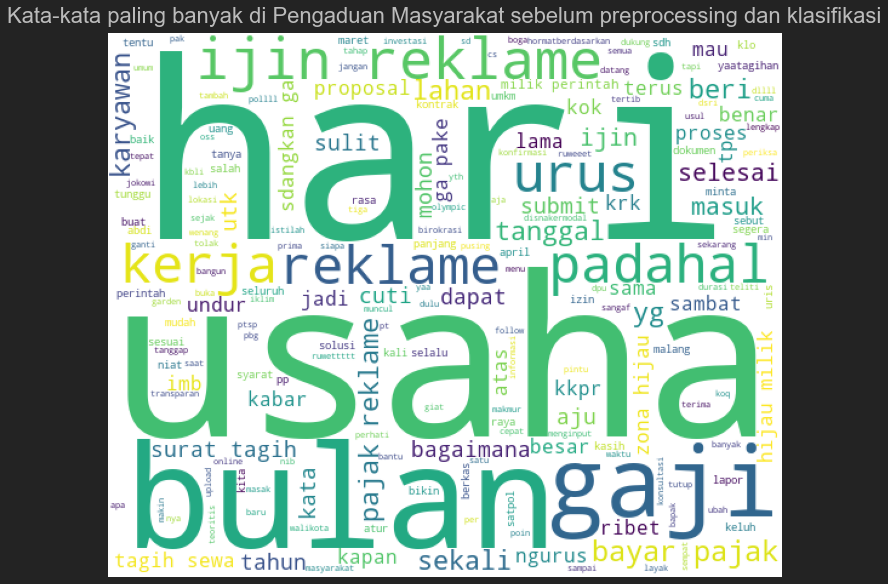

In [125]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_prep.loc[data_prep['kelas'] == 'Pengaduan Layanan', 'laporan_join']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Masyarakat sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

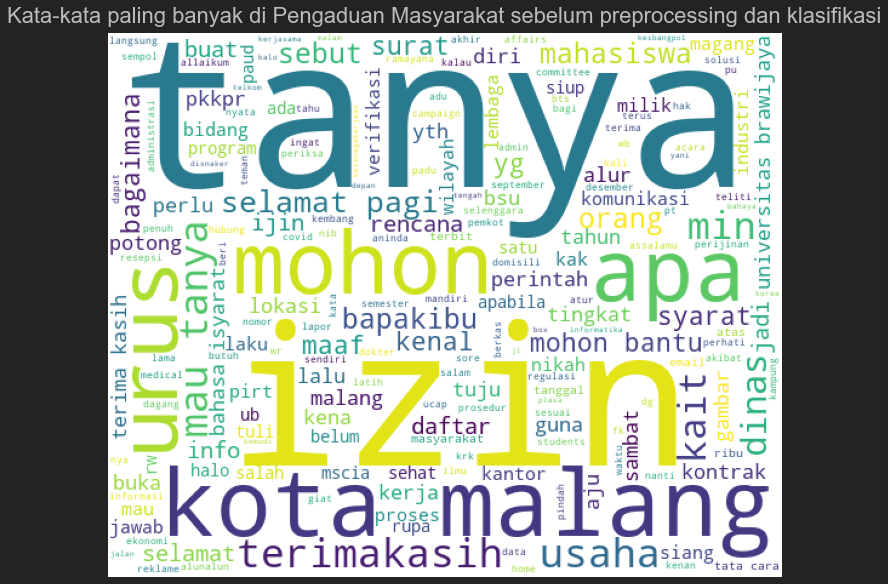

In [126]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_prep.loc[data_prep['kelas'] == 'Permohonan Informasi', 'laporan_join']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Masyarakat sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

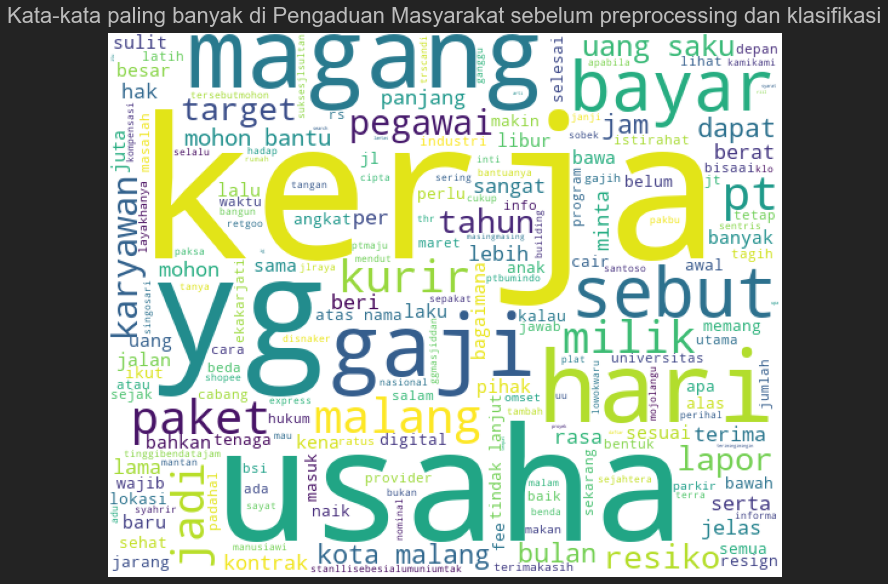

In [124]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_prep.loc[data_prep['kelas'] == 'Pengaduan Ketenagakerjaan', 'laporan_join']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Masyarakat sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

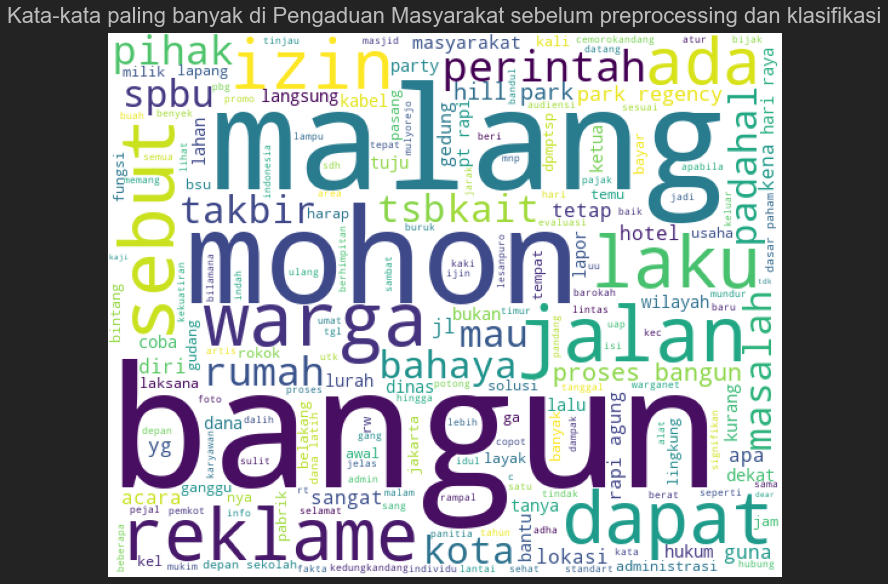

In [122]:
twitter_mask = np.array(Image.open('twitter_mask.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_prep.loc[data_prep['kelas'] == 'Pengaduan Masyarakat', 'laporan_join']))
plt.figure(figsize=(18,10))
plt.title('Kata-kata paling banyak di Pengaduan Masyarakat sebelum preprocessing dan klasifikasi', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

<hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#2e4f4f; font-size:25px; padding-bottom:10px;">Modelling and Classification</h1>

In [115]:
X = data_prep["laporan_join"]
Y = data_prep["kelas"]

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
print("Jumlah Data Training Sebanyak :" , len(x_train))
print("Jumlah Data Testing Sebanyak :", len(x_test))

Jumlah Data Training Sebanyak : 75
Jumlah Data Testing Sebanyak : 19


In [117]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=max_features)
vect.fit(x_train)
print(vect)

CountVectorizer(max_features=1000)


In [118]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

Klasifikasi Naive Bayes

In [110]:
# Create a Multinomial Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

 <hr style="height:1px;"/>
<h1 style="font-weight:bold; color:#2e4f4f; font-size:25px; padding-bottom:10px;">Evaluasi</h1>


In [111]:
# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(x_train_dtm,y_train)
predicted = clf.predict(x_test_dtm)

#printing accuracy, Confusion matrix, Precision and Recall
acc = metrics.accuracy_score(y_test,predicted)*100
conf = metrics.confusion_matrix(y_test,predicted)
rec = metrics.classification_report(y_test,predicted)

print('\n Nilai akurasi klasifikasi Naive Bayes: ', "%.5s" % acc + "%")
print('\n Classification report is: \n', rec)


 Nilai akurasi klasifikasi Naive Bayes:  89.47%

 Classification report is: 
                            precision    recall  f1-score   support

Pengaduan Ketenagakerjaan       1.00      1.00      1.00         4
        Pengaduan Layanan       1.00      1.00      1.00         2
     Pengaduan Masyarakat       0.00      0.00      0.00         1
     Permohonan Informasi       0.92      0.92      0.92        12

                 accuracy                           0.89        19
                macro avg       0.73      0.73      0.73        19
             weighted avg       0.89      0.89      0.89        19



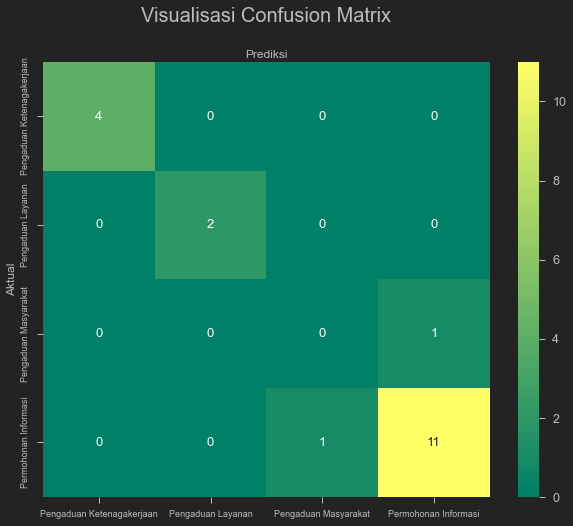

In [112]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test,predicted), annot=True, fmt=".0f", ax=ax, cmap='summer')
plt.title('Visualisasi Confusion Matrix\n', size=20)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Prediksi', fontsize = 12)
ax.set_xticklabels(['Pengaduan Ketenagakerjaan', 'Pengaduan Layanan', 'Pengaduan Masyarakat','Permohonan Informasi'], fontsize=9)
ax.set_ylabel('Aktual', fontsize = 12)
ax.set_yticklabels(['Pengaduan Ketenagakerjaan', 'Pengaduan Layanan', 'Pengaduan Masyarakat','Permohonan Informasi'], fontsize=9)
plt.show()

In [113]:
print("Akurasi =",accuracy_score(predicted, y_test))
precision, recall, fscore, support = score(y_test, predicted, average='weighted')
print("Presisi =", precision)
print("Recall =", recall)
print("F-score =", fscore)

Akurasi = 0.8947368421052632
Presisi = 0.8947368421052632
Recall = 0.8947368421052632
F-score = 0.8947368421052632


In [114]:
hasil_prediksi = pd.DataFrame({'Data': x_test, 'Actual_Label': y_test, 'Predicted_Label': predicted})
print(hasil_prediksi)